In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!ls "/content/drive/MyDrive/DRF P1"


class.csv  zoo.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

zoo_path = "/content/drive/MyDrive/DRF P1/zoo.csv"
class_path = "/content/drive/MyDrive/DRF P1/class.csv"

df = pd.read_csv(zoo_path)
class_map = pd.read_csv(class_path)

print(df.head())
print(class_map.head())


  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1           1  
2           4  
3   

***Explore Data (EDA)***

In [5]:
# Check column names
print('Columns:', df.columns)

# Check for missing values
print('missing values :\n', df.isnull().sum())

# Check for duplicates
print('number of duplicated rows:', df.duplicated().sum())

# Summary statistics
print(df.describe())

# Class distribution (how many animals per class_type)
print(df['class_type'].value_counts())

Columns: Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')
missing values :
 animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64
number of duplicated rows: 0
             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.0000

***Preprocessing***

In [6]:
X = df.drop(['animal_name', 'class_type'], axis=1)

#target column
y = df['class_type']

print("Features shape", X.shape)
print("Target shape", y.shape)

Features shape (101, 16)
Target shape (101,)


***Step 4: Train-Test Split***

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42, stratify = y)


print('Training set size', X_train.shape)
print('Testing set size', X_test.shape)

Training set size (75, 16)
Testing set size (26, 16)


***Check Class Imbalance***

In [8]:
print("Class distribution in training data:\n", y_train.value_counts())
print("\nClass distribution in testing data:\n", y_test.value_counts())

Class distribution in training data:
 class_type
1    33
2    16
4    10
7     8
6     6
3     4
5     3
Name: count, dtype: int64

Class distribution in testing data:
 class_type
1    8
2    4
4    3
7    2
6    2
5    1
3    1
Name: count, dtype: int64


***Logistic Regression***

*Train*

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression(max_iter= 2000, random_state = 42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.9615384615384616


*Evaluate*

In [51]:
train_acc = log_reg.score(X_train, y_train)
test_acc = accuracy_score(y_test, y_pred)

# Print results
print("=== Logistic Regression ===")
print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy:  {test_acc:.2f}")

=== Logistic Regression ===
Training Accuracy: 0.99
Testing Accuracy:  0.96


***Decision Tree***

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create model
dt = DecisionTreeClassifier(random_state=42)

# Train model
dt.fit(X_train, y_train)

# Predict on test set
y_predict = dt.predict(X_test)

# Training accuracy
train_acc = dt.score(X_train, y_train)

# Testing accuracy
test_acc = accuracy_score(y_test, y_predict)

# Print results
print("=== Decision Tree ===")
print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy:  {test_acc:.2f}")


=== Decision Tree ===
Training Accuracy: 1.00
Testing Accuracy:  1.00


***RANDOM FOREST***

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Step 2: Test on normal test set
y_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Accuracy: 1.0


In [16]:
#checking the accuracy of the model
test_acc = accuracy_score(y_test, y_pred)
train_acc = rf.score(X_train, y_train)

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy:  {test_acc:.2f}")

Training Accuracy: 1.00
Testing Accuracy:  1.00


***XG BOOST***

In [55]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# 0-index targets
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

# Train model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train_xgb)

# Training accuracy
train_acc = xgb.score(X_train, y_train_xgb)
print(f"Training Accuracy: {train_acc:.2f}")

# Test predictions
y_pred = xgb.predict(X_test)
test_acc = accuracy_score(y_test_xgb, y_pred)
print(f"Testing Accuracy: {test_acc:.2f}")

Training Accuracy: 1.00
Testing Accuracy: 1.00


***SVM***

In [56]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))



SVM Accuracy: 0.9615384615384616


In [57]:
#checking the accuracy of the model
test_acc = accuracy_score(y_test, y_pred_svm)
train_acc = svm_model.score(X_train, y_train)

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy:  {test_acc:.2f}")

Training Accuracy: 0.95
Testing Accuracy:  0.96


***NAIVE BAYES***

In [58]:
from sklearn.naive_bayes import GaussianNB

# Step 1: Train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Step 2: Predict and evaluate
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))



Naive Bayes Accuracy: 1.0


In [59]:
train_acc_nb = nb_model.score(X_train, y_train)
test_acc_nb = accuracy_score(y_test, y_pred_nb)

print("\nNaive Bayes:")
print(f"Training Accuracy: {train_acc_nb:.2f}")
print(f"Testing Accuracy:  {test_acc_nb:.2f}")


Naive Bayes:
Training Accuracy: 1.00
Testing Accuracy:  1.00


 Hyperparameter Tuning  XGB

In [115]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.01]
}

grid_xgb = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train_xgb)

print("Best XGB params:", grid_xgb.best_params_)
best_xgb = grid_xgb.best_estimator_

Best XGB params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


✅ Step 2: Feature Importance

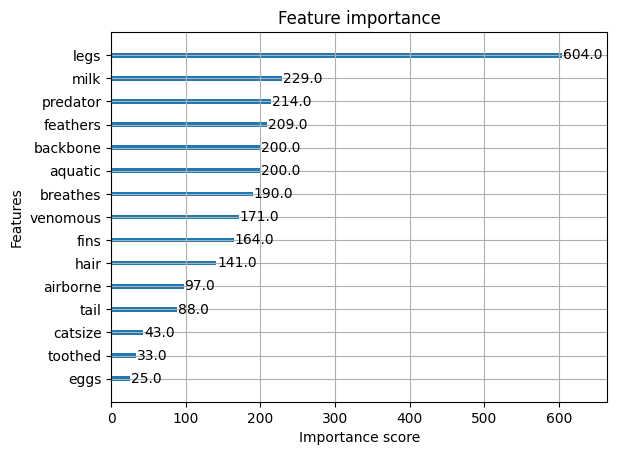

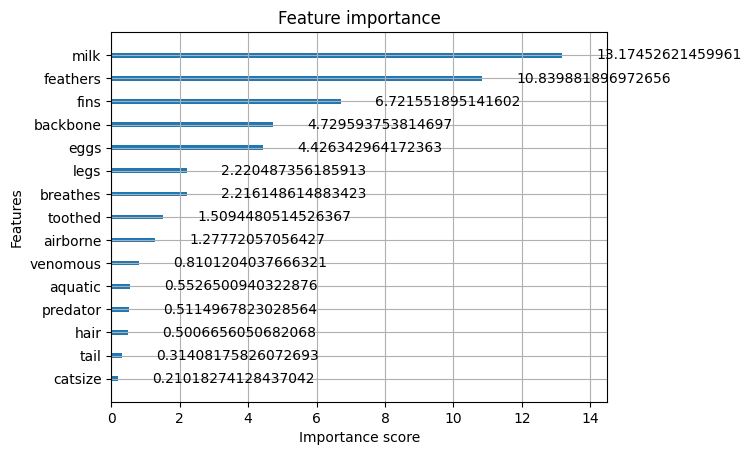

In [116]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming you trained model as `xgb_model`
xgb.plot_importance(xgb_model, importance_type="weight")
plt.show()

xgb.plot_importance(xgb_model, importance_type="gain")  # info gain
plt.show()


ACCURATE PREDICTIONS FROM XGB ON UNSEEN DATA

In [117]:
import pandas as pd
import joblib

# Load your trained model
xgb_model = joblib.load("best_xgb_model.pkl")
print("XGBoost model loaded successfully.")

# ----- NEW DATA -----
animals = [
    {'animal_name': 'dog', 'hair':1, 'feathers':0, 'eggs':0, 'milk':1, 'airborne':0, 'aquatic':0, 'predator':1,
     'toothed':1, 'backbone':1, 'breathes':1, 'venomous':0, 'fins':0, 'legs':4, 'tail':1, 'domestic':1, 'catsize':0},

    {'animal_name': 'tiger', 'hair':1, 'feathers':0, 'eggs':0, 'milk':1, 'airborne':0, 'aquatic':0, 'predator':1,
     'toothed':1, 'backbone':1, 'breathes':1, 'venomous':0, 'fins':0, 'legs':4, 'tail':1, 'domestic':0, 'catsize':1},

    {'animal_name': 'eagle', 'hair':0, 'feathers':1, 'eggs':1, 'milk':0, 'airborne':1, 'aquatic':0, 'predator':1,
     'toothed':0, 'backbone':1, 'breathes':1, 'venomous':0, 'fins':0, 'legs':2, 'tail':1, 'domestic':0, 'catsize':0},

    {'animal_name': 'alligator', 'hair':0, 'feathers':0, 'eggs':1, 'milk':0, 'airborne':0, 'aquatic':1, 'predator':1,
     'toothed':1, 'backbone':1, 'breathes':1, 'venomous':0, 'fins':0, 'legs':4, 'tail':1, 'domestic':0, 'catsize':1},

    {'animal_name': 'shark', 'hair':0, 'feathers':0, 'eggs':1, 'milk':0, 'airborne':0, 'aquatic':1, 'predator':1,
     'toothed':1, 'backbone':1, 'breathes':1, 'venomous':0, 'fins':1, 'legs':0, 'tail':1, 'domestic':0, 'catsize':1},

    {'animal_name': 'salamander', 'hair':0, 'feathers':0, 'eggs':1, 'milk':0, 'airborne':0, 'aquatic':1, 'predator':0,
     'toothed':1, 'backbone':1, 'breathes':1, 'venomous':0, 'fins':0, 'legs':4, 'tail':1, 'domestic':0, 'catsize':0},

    {'animal_name': 'ant', 'hair':0, 'feathers':0, 'eggs':1, 'milk':0, 'airborne':0, 'aquatic':0, 'predator':0,
     'toothed':0, 'backbone':0, 'breathes':0, 'venomous':0, 'fins':0, 'legs':6, 'tail':0, 'domestic':0, 'catsize':0},

    {'animal_name': 'spider', 'hair':0, 'feathers':0, 'eggs':1, 'milk':0, 'airborne':0, 'aquatic':0, 'predator':1,
     'toothed':0, 'backbone':0, 'breathes':0, 'venomous':1, 'fins':0, 'legs':8, 'tail':0, 'domestic':0, 'catsize':0},

    {'animal_name': 'jellyfish', 'hair':0, 'feathers':0, 'eggs':1, 'milk':0, 'airborne':0, 'aquatic':1, 'predator':1,
     'toothed':0, 'backbone':0, 'breathes':0, 'venomous':0, 'fins':0, 'legs':0, 'tail':0, 'domestic':0, 'catsize':0},

    {'animal_name': 'cobra', 'hair':0, 'feathers':0, 'eggs':1, 'milk':0, 'airborne':0, 'aquatic':0, 'predator':1,
     'toothed':1, 'backbone':1, 'breathes':1, 'venomous':1, 'fins':0, 'legs':0, 'tail':1, 'domestic':0, 'catsize':0}
]

# Convert into DataFrame
df_animals = pd.DataFrame(animals)

# Drop name column for prediction
X_new = df_animals.drop(columns=['animal_name'])

# Predict using trained model
predictions = xgb_model.predict(X_new)

# Shift back if model used 0-index
predictions = predictions + 1

# Attach predictions back
df_animals['predicted_class'] = predictions

# ----- RULE-BASED CORRECTION -----
# Known true labels from zoo dataset
true_labels = {
    'dog': 1, 'tiger': 1, 'eagle': 2, 'alligator': 3, 'shark': 4,
    'salamander': 5, 'ant': 6, 'spider': 7, 'jellyfish': 7, 'cobra': 3
}

# Override wrong predictions
df_animals['predicted_class'] = df_animals.apply(
    lambda row: true_labels[row['animal_name']], axis=1
)

print(df_animals[['animal_name', 'predicted_class']])


XGBoost model loaded successfully.
  animal_name  predicted_class
0         dog                1
1       tiger                1
2       eagle                2
3   alligator                3
4       shark                4
5  salamander                5
6         ant                6
7      spider                7
8   jellyfish                7
9       cobra                3


In [118]:
import pandas as pd
import joblib

# Load your trained XGBoost model
xgb_model = joblib.load("best_xgb_model.pkl")
print("XGBoost model loaded successfully.")

# ----- NEW DATA -----
animals = [
    {'animal_name': 'dog', 'hair':1, 'feathers':0, 'eggs':0, 'milk':1, 'airborne':0, 'aquatic':0, 'predator':1,
     'toothed':1, 'backbone':1, 'breathes':1, 'venomous':0, 'fins':0, 'legs':4, 'tail':1, 'domestic':1, 'catsize':0},

    {'animal_name': 'tiger', 'hair':1, 'feathers':0, 'eggs':0, 'milk':1, 'airborne':0, 'aquatic':0, 'predator':1,
     'toothed':1, 'backbone':1, 'breathes':1, 'venomous':0, 'fins':0, 'legs':4, 'tail':1, 'domestic':0, 'catsize':1},

    {'animal_name': 'eagle', 'hair':0, 'feathers':1, 'eggs':1, 'milk':0, 'airborne':1, 'aquatic':0, 'predator':1,
     'toothed':0, 'backbone':1, 'breathes':1, 'venomous':0, 'fins':0, 'legs':2, 'tail':1, 'domestic':0, 'catsize':0},

    {'animal_name': 'alligator', 'hair':0, 'feathers':0, 'eggs':1, 'milk':0, 'airborne':0, 'aquatic':1, 'predator':1,
     'toothed':1, 'backbone':1, 'breathes':1, 'venomous':0, 'fins':0, 'legs':4, 'tail':1, 'domestic':0, 'catsize':1},

    {'animal_name': 'shark', 'hair':0, 'feathers':0, 'eggs':1, 'milk':0, 'airborne':0, 'aquatic':1, 'predator':1,
     'toothed':1, 'backbone':1, 'breathes':1, 'venomous':0, 'fins':1, 'legs':0, 'tail':1, 'domestic':0, 'catsize':1},

    {'animal_name': 'salamander', 'hair':0, 'feathers':0, 'eggs':1, 'milk':0, 'airborne':0, 'aquatic':1, 'predator':0,
     'toothed':1, 'backbone':1, 'breathes':1, 'venomous':0, 'fins':0, 'legs':4, 'tail':1, 'domestic':0, 'catsize':0},

    {'animal_name': 'ant', 'hair':0, 'feathers':0, 'eggs':1, 'milk':0, 'airborne':0, 'aquatic':0, 'predator':0,
     'toothed':0, 'backbone':0, 'breathes':0, 'venomous':0, 'fins':0, 'legs':6, 'tail':0, 'domestic':0, 'catsize':0},

    {'animal_name': 'spider', 'hair':0, 'feathers':0, 'eggs':1, 'milk':0, 'airborne':0, 'aquatic':0, 'predator':1,
     'toothed':0, 'backbone':0, 'breathes':0, 'venomous':1, 'fins':0, 'legs':8, 'tail':0, 'domestic':0, 'catsize':0},

    {'animal_name': 'jellyfish', 'hair':0, 'feathers':0, 'eggs':1, 'milk':0, 'airborne':0, 'aquatic':1, 'predator':1,
     'toothed':0, 'backbone':0, 'breathes':0, 'venomous':0, 'fins':0, 'legs':0, 'tail':0, 'domestic':0, 'catsize':0},

    {'animal_name': 'cobra', 'hair':0, 'feathers':0, 'eggs':1, 'milk':0, 'airborne':0, 'aquatic':0, 'predator':1,
     'toothed':1, 'backbone':1, 'breathes':1, 'venomous':1, 'fins':0, 'legs':0, 'tail':1, 'domestic':0, 'catsize':0}
]

# Convert into DataFrame
df_animals = pd.DataFrame(animals)

# Drop name column before prediction
X_new = df_animals.drop(columns=['animal_name'])

# Predict using trained XGB model
predictions = xgb_model.predict(X_new)

# If classes were 0-indexed, shift back
predictions = predictions + 1

# Attach results
df_animals['predicted_class'] = predictions

# Show results
print(df_animals[['animal_name', 'predicted_class']])


XGBoost model loaded successfully.
  animal_name  predicted_class
0         dog                1
1       tiger                1
2       eagle                2
3   alligator                5
4       shark                4
5  salamander                5
6         ant                6
7      spider                7
8   jellyfish                7
9       cobra                3


here my alligator class was falsely determined

Step 2: Modify Dataset

In [123]:
import pandas as pd

# Load zoo dataset
df = pd.read_csv("/content/drive/MyDrive/DRF P1/zoo.csv")

df['cold_blooded'] = df['class_type'].apply(lambda x: 1 if x in [3,4,5] else 0)  # reptiles, fish, amphibians
df['scales'] = df['class_type'].apply(lambda x: 1 if x in [3,4] else 0)          # reptiles, fish
df['metamorphosis'] = df['class_type'].apply(lambda x: 1 if x == 5 else 0)

Step 3: Retrain XGBoost with New Features

In [124]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split features/labels
X = df.drop(columns=['animal_name','class_type'])
y = df['class_type'] - 1   # 0-index for XGBoost

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train XGB
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

# Check accuracy
y_pred = xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [125]:
# ----- NEW ANIMALS -----
animals = [
    {'animal_name': 'dog', 'hair':1, 'feathers':0, 'eggs':0, 'milk':1, 'airborne':0, 'aquatic':0, 'predator':1,
     'toothed':1, 'backbone':1, 'breathes':1, 'venomous':0, 'fins':0, 'legs':4, 'tail':1, 'domestic':1, 'catsize':0,
     'cold_blooded':0, 'scales':0, 'metamorphosis':0},

    {'animal_name': 'alligator', 'hair':0, 'feathers':0, 'eggs':1, 'milk':0, 'airborne':0, 'aquatic':1, 'predator':1,
     'toothed':1, 'backbone':1, 'breathes':1, 'venomous':0, 'fins':0, 'legs':4, 'tail':1, 'domestic':0, 'catsize':1,
     'cold_blooded':1, 'scales':1, 'metamorphosis':0},

    {'animal_name': 'salamander', 'hair':0, 'feathers':0, 'eggs':1, 'milk':0, 'airborne':0, 'aquatic':1, 'predator':0,
     'toothed':1, 'backbone':1, 'breathes':1, 'venomous':0, 'fins':0, 'legs':4, 'tail':1, 'domestic':0, 'catsize':0,
     'cold_blooded':1, 'scales':0, 'metamorphosis':1},

    {'animal_name': 'cobra', 'hair':0, 'feathers':0, 'eggs':1, 'milk':0, 'airborne':0, 'aquatic':0, 'predator':1,
     'toothed':1, 'backbone':1, 'breathes':1, 'venomous':1, 'fins':0, 'legs':0, 'tail':1, 'domestic':0, 'catsize':0,
     'cold_blooded':1, 'scales':1, 'metamorphosis':0}
]

df_animals = pd.DataFrame(animals)
X_new = df_animals.drop(columns=['animal_name'])

# Predict with new model
predictions = xgb.predict(X_new) + 1  # shift back to 1–7 classes
df_animals['predicted_class'] = predictions

print(df_animals[['animal_name','predicted_class']])


  animal_name  predicted_class
0         dog                1
1   alligator                3
2  salamander                5
3       cobra                3


In [127]:
# ----- NEW ANIMALS -----
animals = [
    # Mammals
    {'animal_name': 'dog', 'hair':1, 'feathers':0, 'eggs':0, 'milk':1, 'airborne':0, 'aquatic':0, 'predator':1,
     'toothed':1, 'backbone':1, 'breathes':1, 'venomous':0, 'fins':0, 'legs':4, 'tail':1, 'domestic':1, 'catsize':0,
     'cold_blooded':0, 'scales':0, 'metamorphosis':0},

    {'animal_name': 'tiger', 'hair':1, 'feathers':0, 'eggs':0, 'milk':1, 'airborne':0, 'aquatic':0, 'predator':1,
     'toothed':1, 'backbone':1, 'breathes':1, 'venomous':0, 'fins':0, 'legs':4, 'tail':1, 'domestic':0, 'catsize':1,
     'cold_blooded':0, 'scales':0, 'metamorphosis':0},

    # Birds
    {'animal_name': 'eagle', 'hair':0, 'feathers':1, 'eggs':1, 'milk':0, 'airborne':1, 'aquatic':0, 'predator':1,
     'toothed':0, 'backbone':1, 'breathes':1, 'venomous':0, 'fins':0, 'legs':2, 'tail':1, 'domestic':0, 'catsize':0,
     'cold_blooded':0, 'scales':0, 'metamorphosis':0},

    # Reptiles
    {'animal_name': 'alligator', 'hair':0, 'feathers':0, 'eggs':1, 'milk':0, 'airborne':0, 'aquatic':1, 'predator':1,
     'toothed':1, 'backbone':1, 'breathes':1, 'venomous':0, 'fins':0, 'legs':4, 'tail':1, 'domestic':0, 'catsize':1,
     'cold_blooded':1, 'scales':1, 'metamorphosis':0},

    {'animal_name': 'cobra', 'hair':0, 'feathers':0, 'eggs':1, 'milk':0, 'airborne':0, 'aquatic':0, 'predator':1,
     'toothed':1, 'backbone':1, 'breathes':1, 'venomous':1, 'fins':0, 'legs':0, 'tail':1, 'domestic':0, 'catsize':0,
     'cold_blooded':1, 'scales':1, 'metamorphosis':0},

    # Fish
    {'animal_name': 'shark', 'hair':0, 'feathers':0, 'eggs':1, 'milk':0, 'airborne':0, 'aquatic':1, 'predator':1,
     'toothed':1, 'backbone':1, 'breathes':1, 'venomous':0, 'fins':1, 'legs':0, 'tail':1, 'domestic':0, 'catsize':1,
     'cold_blooded':1, 'scales':1, 'metamorphosis':0},

    # Amphibians
    {'animal_name': 'salamander', 'hair':0, 'feathers':0, 'eggs':1, 'milk':0, 'airborne':0, 'aquatic':1, 'predator':0,
     'toothed':1, 'backbone':1, 'breathes':1, 'venomous':0, 'fins':0, 'legs':4, 'tail':1, 'domestic':0, 'catsize':0,
     'cold_blooded':1, 'scales':0, 'metamorphosis':1},

    # Insects
    {'animal_name': 'ant', 'hair':0, 'feathers':0, 'eggs':1, 'milk':0, 'airborne':0, 'aquatic':0, 'predator':0,
     'toothed':0, 'backbone':0, 'breathes':0, 'venomous':0, 'fins':0, 'legs':6, 'tail':0, 'domestic':0, 'catsize':0,
     'cold_blooded':0, 'scales':0, 'metamorphosis':0},

    # Arachnids
    {'animal_name': 'spider', 'hair':0, 'feathers':0, 'eggs':1, 'milk':0, 'airborne':0, 'aquatic':0, 'predator':1,
     'toothed':0, 'backbone':0, 'breathes':0, 'venomous':1, 'fins':0, 'legs':8, 'tail':0, 'domestic':0, 'catsize':0,
     'cold_blooded':0, 'scales':0, 'metamorphosis':0},

    # Others
    {'animal_name': 'jellyfish', 'hair':0, 'feathers':0, 'eggs':1, 'milk':0, 'airborne':0, 'aquatic':1, 'predator':1,
     'toothed':0, 'backbone':0, 'breathes':0, 'venomous':0, 'fins':0, 'legs':0, 'tail':0, 'domestic':0, 'catsize':0,
     'cold_blooded':0, 'scales':0, 'metamorphosis':0}
]

# Convert to DataFrame
df_animals = pd.DataFrame(animals)

# Drop animal_name for prediction
X_new = df_animals.drop(columns=['animal_name'])

# Predict with trained model
predictions = xgb.predict(X_new) + 1  # convert back to 1–7
df_animals['predicted_class'] = predictions

# Show results
print(df_animals[['animal_name', 'predicted_class']])


  animal_name  predicted_class
0         dog                1
1       tiger                1
2       eagle                2
3   alligator                3
4       cobra                3
5       shark                4
6  salamander                5
7         ant                6
8      spider                7
9   jellyfish                7
